# Network Scraping - Anyone
This notebook contains reproducible code that can be used to pull any node's network of followers and populate the graph with profile information

In [1]:
import tweepy
import pandas as pd

### Setup API

In [2]:
consumer_key = 'XXXXXXXXX'
consumer_secret = 'XXXXXXX'
access_token = 'XXXXXXX-XXXX'
access_token_secret = 'XXXXXXXXXXXXXX'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [127]:
me = api.get_user(screen_name = 'CongresswomanSC')
me.id

1484252226646421505

### Pull Followers of Source Node

In [128]:
user_list = ["1484252226646421505"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.TweepError:
        print("error")
        continue
    follower_list.append(followers)

1542


In [129]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 1484252226646421505  #Set my user ID as the source 

#### Visualize Followers

In [130]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

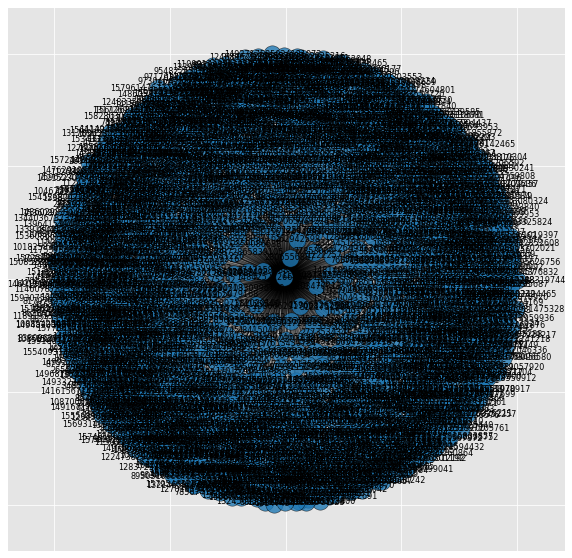

In [131]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

### Pull Followers of Followers

In [ ]:
user_list = list(df['target']) #Use the list of followers we extracted in the code above i.e. my 450 followers
for userID in user_list:
    print(userID)
    followers = []
    follower_list = []

    try:
        
        # fetching the user
        user = api.get_user(user_id = userID)

        # fetching the followers_count
        followers_count = user.followers_count

        for page in tweepy.Cursor(api.get_follower_ids, user_id=userID).pages():
            followers.extend(page)
            print(len(followers))
            if followers_count >= 500: #Only take first 500 followers
                break
    except tweepy.errors.TweepyException as e:
        print("error")
        continue
    follower_list.append(followers)
    temp = pd.DataFrame(columns=['source', 'target'])
    temp['target'] = follower_list[0]
    temp['source'] = userID
    df = df.append(temp)
    df.to_csv("networkOfFollowers.csv")

In [152]:
# Construct Directed Graph

import networkx as nx

edge_list_df = pd.read_csv('../datasets/networkOfFollowers-Hedden.csv') #Read into a df
edge_list_df = edge_list_df.astype(int)
edge_list_df

,Unnamed: 0,source,target
0,0,1210627806,1565499318596952064
1,1,1210627806,1180133955187695616
2,2,1210627806,1449127446222188288
3,3,1210627806,2316443093
4,4,1210627806,1379982756986376192
...,...,...,...
860720,4995,45436858,1441975018502516736
860721,4996,45436858,1441946633831288832
860722,4997,45436858,1411344846372147200
860723,4998,45436858,1441931168711016448


In [153]:
G_directed = nx.from_pandas_edgelist(edge_list_df, 
                                     source = 'target', 
                                     target ='source', 
                                     create_using=nx.DiGraph()
                                    )

G_directed.is_directed()

True

In [154]:
G_directed.number_of_nodes() #Find the total number of nodes in this graph

740020

In [155]:
#Highest Degree Nodes

G_sorted = pd.DataFrame(sorted(G_directed.degree, key=lambda x: x[1], reverse=True))
G_sorted.columns = ['nconst','degree']
G_sorted.head()

,nconst,degree
0,37728789,5044
1,45436858,5034
2,16248319,5031
3,372262602,5029
4,23834147,5028


In [157]:
#Exclude nodes with degree less than 10

G_tmp = nx.k_core(G_directed, 7) 
G_tmp.number_of_nodes()

2581

In [158]:
print(G_tmp)
nx.write_edgelist(G_tmp, "Hedden.csv")

DiGraph with 2581 nodes and 24665 edges


### Get Node Attributes

In [ ]:
verified_dict = dict()
follower_count_dict = dict()
name = dict()
screen_name = dict()
location = dict()
profile_location = dict()
protected = dict()
friends_count = dict()
listed_count = dict()
created_at = dict()
favourites_count = dict()
geo_enabled = dict()
statuses_count = dict()
lang = dict()
contributors_enabled = dict()
is_translator = dict()
is_translation_enabled = dict()
profile_use_background_image = dict()
has_extended_profile = dict()
default_profile = dict()
default_profile_image = dict()

i = 0
for node in G_tmp.nodes():
    print(i)
    i += 1
    user_id = int(node)
    try:
        user = api.get_user(user_id = user_id)
        follower_count_dict[user_id] = int(user.followers_count) 
        verified_dict[user_id] = user.verified
        name[user_id] = user.name
        screen_name[user_id] = user.screen_name
        location[user_id] = user.location
        profile_location[user_id] = user.profile_location
        protected[user_id] = user.protected
        friends_count[user_id] = user.friends_count
        listed_count[user_id] = user.listed_count
        created_at[user_id] = user.created_at
        favourites_count[user_id] = user.favourites_count
        geo_enabled[user_id] = user.geo_enabled
        statuses_count[user_id] = user.statuses_count
        lang[user_id] = user.lang
        contributors_enabled[user_id] = user.contributors_enabled
        is_translator[user_id] = user.is_translator
        is_translation_enabled[user_id] = user.is_translation_enabled
        profile_use_background_image[user_id] = user.profile_use_background_image
        has_extended_profile[user_id] = user.has_extended_profile
        default_profile[user_id] = user.default_profile
        default_profile_image[user_id] = user.default_profile_image
        
    except tweepy.errors.TweepyException as e:
        print("error")
        continue

In [ ]:
follower_count_dict

In [161]:
G_test = G_tmp

nx.set_node_attributes(G_test, follower_count_dict, "follower_count")
nx.set_node_attributes(G_test, verified_dict, "verified")
nx.set_node_attributes(G_test, name, "name")
nx.set_node_attributes(G_test, screen_name, "screen_name")
nx.set_node_attributes(G_test, protected, "protected")
nx.set_node_attributes(G_test, friends_count, "friends_count")
nx.set_node_attributes(G_test, listed_count, "listed_count")
nx.set_node_attributes(G_test, favourites_count, "favourites_count")
nx.set_node_attributes(G_test, geo_enabled, "geo_enabled")
nx.set_node_attributes(G_test, statuses_count, "statuses_count")
nx.set_node_attributes(G_test, contributors_enabled, "contributors_enabled")
nx.set_node_attributes(G_test, is_translator, "is_translator")
nx.set_node_attributes(G_test, is_translation_enabled, "is_translation_enabled")
nx.set_node_attributes(G_test, profile_use_background_image, "profile_use_background_image")
nx.set_node_attributes(G_test, has_extended_profile, "has_extended_profile")
nx.set_node_attributes(G_test, default_profile, "default_profile")
nx.set_node_attributes(G_test, default_profile_image, "default_profile_image")

In [ ]:
print(G_test.nodes.data(True))

## Clean Node Attributes
Remove empty nodes and values with 'None'

In [ ]:
G_clean = G_test
problems = []

for node in G_test.nodes(data = True):
    if len(node[1]) == 0:
        problems.append(node[0])
    #if node.data() is None:
    #    print("FAH SHOOO")

print(problems)

In [164]:
for problem in problems:
    G_clean.remove_node(problem)

In [ ]:
nones = dict()

for node in G_clean.nodes(data = True):
    node_id = node[0]
    issues = []
    for k,v in node[1].items():
        if v is None:
            issues.append(k)
    nones[node_id] = issues

print(nones)
#nx.set_node_attributes(G_clean, new_info)

In [ ]:
for node in G_clean.nodes(data = True):
    print(node)

In [167]:
G_clean.number_of_nodes()

2446

In [168]:
nx.write_gml(G_clean, "Hedden.gml")